In [1]:
import os
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: C:\Users\jackf\OneDrive\Desktop\Bike_Sharing\UCI_Bike_Sharing


In [5]:
import pandas as pd

# Specify the path to your CSV file including the file name
file_path = r'C:\Users\jackf\OneDrive\Desktop\Bike_Sharing\UCI_Bike_Sharing\data\day.csv'

# Read the CSV file into a DataFrame
day_Bike = pd.read_csv(file_path)

# Display the DataFrame
day_Bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

X = day_Bike.drop(['cnt', "casual", "registered"], axis=1)
y = day_Bike['cnt']

# Split the data into training and testing sets (adjust the test_size parameter as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

formula = ('cnt ~ season + yr + mnth + holiday + weekday + '
           'workingday + weathersit + temp + atemp + hum + windspeed')

ols_model = smf.ols(formula=formula, data=day_Bike)

model1 = ols_model.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     261.9
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          7.80e-243
Time:                        19:20:41   Log-Likelihood:                -5981.0
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     719   BIC:                         1.204e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1469.0031    240.218      6.115      0.0

In [7]:
from sklearn.metrics import r2_score
y_pred = model1.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared on the test set: {r_squared}') 

R-squared on the test set: 0.8324560523959417


Mean Squared Error (MSE): 671831.5080568684


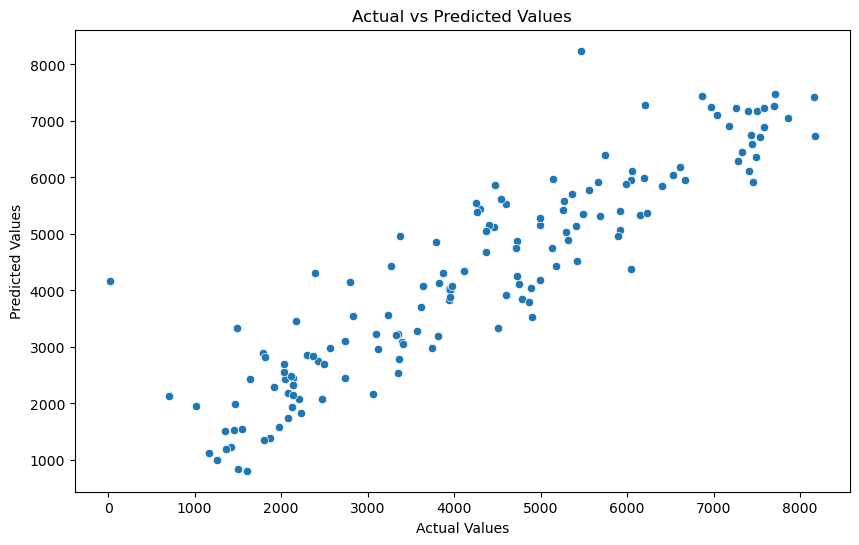

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have already defined and trained your model (model1)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Create a DataFrame for actual versus predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Visualize actual versus predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=df_results)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [3]:
day_Bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [9]:
import pandas as pd

# Create a new data point for the date you want to predict
new_data = pd.DataFrame({
    'season': [1],        # Replace with the appropriate value for the season
    'yr': [0],            # Replace with the appropriate value for the year
    'mnth': [1],          # Replace with the appropriate value for the month
    'holiday': [0],       # Replace with the appropriate value for holiday
    'weekday': [6],       # Replace with the appropriate value for the weekday
    'workingday': [0],    # Replace with the appropriate value for workingday
    'weathersit': [2],    # Replace with the appropriate value for weathersit
    'temp': [0.344167],   # Replace with the appropriate value for temperature
    'atemp': [0.363625],  # Replace with the appropriate value for apparent temperature
    'hum': [0.805833],    # Replace with the appropriate value for humidity
    'windspeed': [0.160446]  # Replace with the appropriate value for windspeed
})

# Make predictions for the new data point
predicted_count = model1.predict(new_data)

print(f'Predicted count for 2011-01-01: {predicted_count.values[0]:.2f}')

Predicted count for 2011-01-01: 1898.43


In [8]:
# Assuming 'model1' is your trained OLS linear regression model

# Create a DataFrame for the specific date's features
specific_date_data = pd.DataFrame({
    'season': [1],
    'yr': [0],
    'mnth': [1],
    'holiday': [0],
    'weekday': [6],
    'workingday': [0],
    'weathersit': [2],
    'temp': [0.344167],
    'atemp': [0.363625],
    'hum': [0.805833],
    'windspeed': [0.160446]
})

# Make predictions for the specific date
predicted_count = model1.predict(specific_date_data)

print(f'Predicted count for 2012-01-01: {predicted_count.values[0]:.2f}')

Predicted count for 2011-01-01: 1898.43


In [10]:
# Assuming 'model1' is your trained OLS linear regression model

# Create a DataFrame for the specific date's features
specific_date_data = pd.DataFrame({
    'season': [1],
    'yr': [1],
    'mnth': [12],
    'holiday': [0],
    'weekday': [1],
    'workingday': [1],
    'weathersit': [2],
    'temp': [0.215833],
    'atemp': [0.223487],
    'hum': [0.577500],
    'windspeed': [0.154846]
})

# Make predictions for the specific date
predicted_count = model1.predict(specific_date_data)

print(f'Predicted count for 2011-12-30: {predicted_count.values[0]:.2f}')


Predicted count for 2011-12-30: 2771.24


In [10]:
# Assuming 'day_Bike' is your DataFrame
specific_date = '2011-01-01'

# Convert the 'dteday' column to datetime format if it's not already
day_Bike['dteday'] = pd.to_datetime(day_Bike['dteday'])

# Use the loc accessor to select the row for the specific date
selected_row = day_Bike.loc[day_Bike['dteday'].dt.strftime('%Y-%m-%d') == specific_date]

# Print the selected row
(selected_row)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Mean Squared Error: 2384573.9940369437
Predicted Count for 2014-06-01 00:00:00: 9792.16513462551


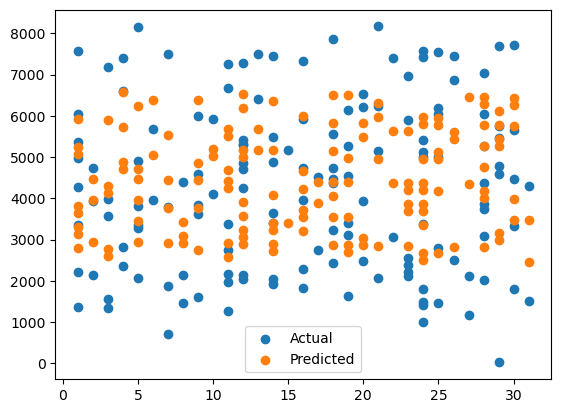

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming day_Bike is your DataFrame with the provided data
day_Bike['dteday'] = pd.to_datetime(day_Bike['dteday'])
day_Bike['day'] = day_Bike['dteday'].dt.day
day_Bike['month'] = day_Bike['dteday'].dt.month
day_Bike['year'] = day_Bike['dteday'].dt.year

# Assuming 'day' is the day you want to predict, and 'cnt' is the target variable
X = day_Bike[['day', 'month', 'year']].values
y = day_Bike['cnt'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Make predictions for future dates
future_date = pd.to_datetime('2014-06-01')
future_data = [[future_date.day, future_date.month, future_date.year]]
future_pred = model.predict(future_data)
print(f'Predicted Count for {future_date}: {future_pred[0]}')

# Visualization (optional)
plt.scatter(X_test[:, 0], y_test, label='Actual')
plt.scatter(X_test[:, 0], y_pred, label='Predicted')
plt.legend()
plt.show()

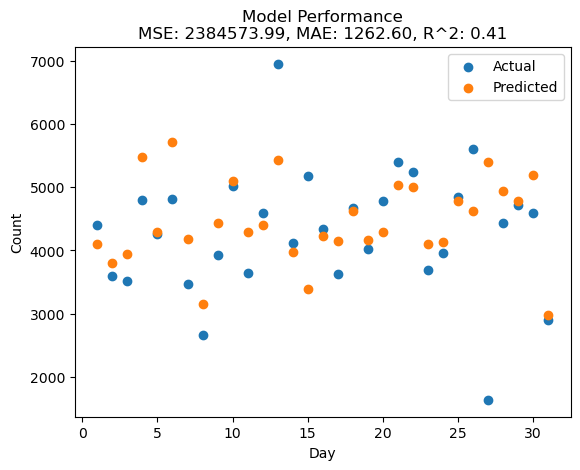

Mean Squared Error (MSE): 2384573.99
Mean Absolute Error (MAE): 1262.60
R-squared (R^2): 0.41


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming day_Bike is your DataFrame with the provided data
day_Bike['dteday'] = pd.to_datetime(day_Bike['dteday'])
day_Bike['day'] = day_Bike['dteday'].dt.day
day_Bike['month'] = day_Bike['dteday'].dt.month
day_Bike['year'] = day_Bike['dteday'].dt.year

# Assuming 'day' is the day you want to predict, and 'cnt' is the target variable
X = day_Bike[['day', 'month', 'year']].values
y = day_Bike['cnt'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Aggregate the data for plotting
agg_test_data = pd.DataFrame({'day': X_test[:, 0], 'y_test': y_test, 'y_pred': y_pred})
agg_test_data = agg_test_data.groupby('day').mean().reset_index()

# Visualize aggregated values
plt.scatter(agg_test_data['day'], agg_test_data['y_test'], label='Actual')
plt.scatter(agg_test_data['day'], agg_test_data['y_pred'], label='Predicted')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()
plt.title(f'Model Performance\nMSE: {mse:.2f}, MAE: {mae:.2f}, R^2: {r2:.2f}')
plt.show()

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R^2): {r2:.2f}')

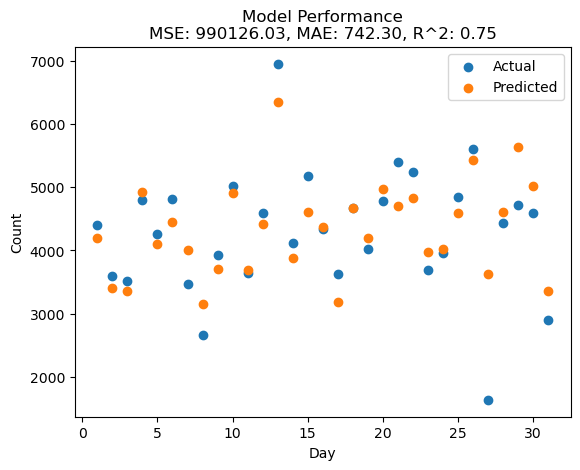

Mean Squared Error (MSE): 990126.03
Mean Absolute Error (MAE): 742.30
R-squared (R^2): 0.75


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming day_Bike is your DataFrame with the provided data
day_Bike['dteday'] = pd.to_datetime(day_Bike['dteday'])
day_Bike['day'] = day_Bike['dteday'].dt.day
day_Bike['month'] = day_Bike['dteday'].dt.month
day_Bike['year'] = day_Bike['dteday'].dt.year

# Assuming 'day', 'temp', and 'hum' are the features you want to include, and 'cnt' is the target variable
selected_features = ['day', 'month', 'year', 'temp', 'hum']
X = day_Bike[selected_features].values
y = day_Bike['cnt'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Aggregate the data for plotting
agg_test_data = pd.DataFrame({'day': X_test[:, 0], 'y_test': y_test, 'y_pred': y_pred})
agg_test_data = agg_test_data.groupby('day').mean().reset_index()

# Visualize aggregated values
plt.scatter(agg_test_data['day'], agg_test_data['y_test'], label='Actual')
plt.scatter(agg_test_data['day'], agg_test_data['y_pred'], label='Predicted')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()
plt.title(f'Model Performance\nMSE: {mse:.2f}, MAE: {mae:.2f}, R^2: {r2:.2f}')
plt.show()

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R^2): {r2:.2f}')

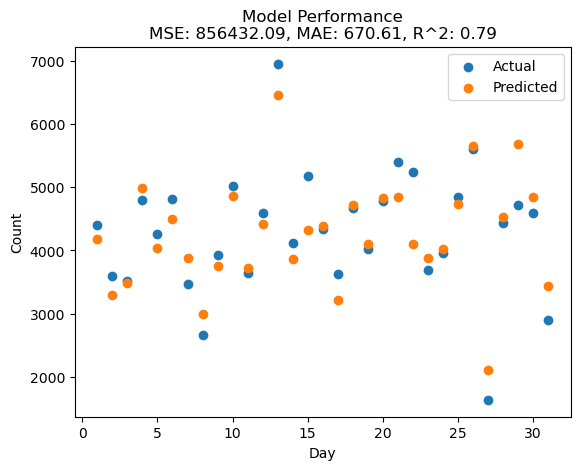

Mean Squared Error (MSE): 856432.09
Mean Absolute Error (MAE): 670.61
R-squared (R^2): 0.79


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming day_Bike is your DataFrame with the provided data
day_Bike['dteday'] = pd.to_datetime(day_Bike['dteday'])
day_Bike['day'] = day_Bike['dteday'].dt.day
day_Bike['month'] = day_Bike['dteday'].dt.month
day_Bike['year'] = day_Bike['dteday'].dt.year

# Assuming 'day', 'temp', and 'hum' are the features you want to include, and 'cnt' is the target variable
selected_features = ['day', 'month', 'year', 'temp', 'hum',"season"]
X = day_Bike[selected_features].values
y = day_Bike['cnt'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Aggregate the data for plotting
agg_test_data = pd.DataFrame({'day': X_test[:, 0], 'y_test': y_test, 'y_pred': y_pred})
agg_test_data = agg_test_data.groupby('day').mean().reset_index()

# Visualize aggregated values
plt.scatter(agg_test_data['day'], agg_test_data['y_test'], label='Actual')
plt.scatter(agg_test_data['day'], agg_test_data['y_pred'], label='Predicted')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()
plt.title(f'Model Performance\nMSE: {mse:.2f}, MAE: {mae:.2f}, R^2: {r2:.2f}')
plt.show()

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R^2): {r2:.2f}')

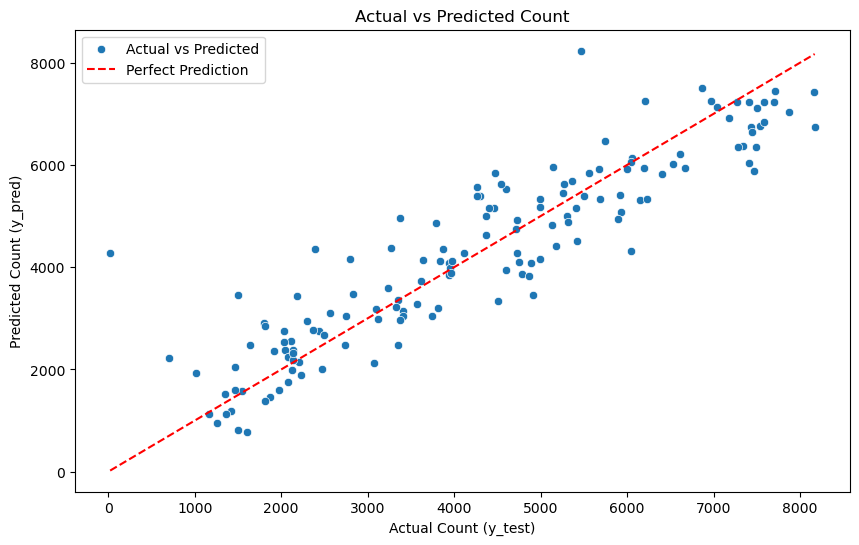

Mean Squared Error (MSE): 691035.01
Mean Absolute Error (MAE): 617.39
R-squared (R^2): 0.83


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced visualization

# Assuming day_Bike is your DataFrame with the provided data
day_Bike['dteday'] = pd.to_datetime(day_Bike['dteday'])
day_Bike['day'] = day_Bike['dteday'].dt.day
day_Bike['month'] = day_Bike['dteday'].dt.month
day_Bike['year'] = day_Bike['dteday'].dt.year

# Select features and target variable
selected_features = ['season', 'yr', 'mnth', 'holiday', 
                     'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
target_variable = 'cnt'

# Drop 'casual' and 'registered' if present
day_Bike = day_Bike.drop(['casual', 'registered'], axis=1, errors='ignore')

# Prepare data
X = day_Bike[selected_features].values
y = day_Bike[target_variable].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize results with seaborn for enhanced plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Count (y_test)')
plt.ylabel('Predicted Count (y_pred)')
plt.title('Actual vs Predicted Count')
plt.legend()
plt.show()

# Print metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R^2): {r2:.2f}')
